In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


Conclusion: CMO Recommendations; provide data-driven recommendations/suggestions to your CMO using visualization.

In [2]:
marketing_data = pd.read_csv('marketing_data.csv')

In [3]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Description to the columns:
    
1. ID - Unique customer id

2. Year_Birth - DOB of customer

3. Education - Latest education qualification of customer

4. Marital_Status - Married/Single

5. Income - Houshold Annual income

6. Kidhome - Number of children in household

7. Teenhome - Number of teenagers in household

8. Dt_Customer - Date of enrolled in the company

9. Recency - Number of days since customers' last purchase

10. MntWines - Amount spent on wines since last 2 years

11. MntFruits - Amount spent on fruits since last 2 years

12. MntMeatProducts - Amount spent on Meat since last 2 years

13. MntFishProducts - Amount spent on Fish since last 2 years

14. MntGoldProds - Amount spent on Gold since last 2 years

15. MntSweetProducts - Amount spent on Sweet since last 2 years

16. NumDealsPurchases - Number of deals made with a discount

17. NumWebPurchases - Number of purchases made through company website

18. NumCatalogPurchases - Number of purchases using catalogues

19. NumStorePurchases - Number of purchases made directly in stores

20. NumWebVisitsMonth - Number of visits to website in last month

21. AcceptedCmp1 - whether customer accepted the offer in 1st campaign

22. AcceptedCmp2 - whether customer accepted the offer in 2nd campaign

23. AcceptedCmp3 - whether customer accepted the offer in 3rd campaign

24. AcceptedCmp4 - whether customer accepted the offer in 4th campaign

25. AcceptedCmp5 - whether customer accepted the offer in 5th campaign

26. Response - Whether customer accepted the offer in the last campaign

27. Complain - Whether customer raises a complaint in last 2 years

28.Country - Country where customer belongs to

#### Inspecting and cleaning the marketing data

In [4]:
marketing_data.shape

(2240, 28)

In [5]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#Any missing values?
nan_df = marketing_data[marketing_data.isna().any(axis=1)]

In [7]:
nan_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [8]:
marketing_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Income column has 24 missing value and white space

To remove the white space before and after the Income column

In [9]:
import re

In [10]:
marketing_data.columns = marketing_data.columns.str.replace(' ', '')

In [11]:
marketing_data['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

Transforming Income column to numerical and not including the dollar sign ($)

In [12]:
marketing_data['Income'] = marketing_data['Income'].str.replace('$', '')
marketing_data['Income'] = marketing_data['Income'].str.replace(',', '').astype('float')

In [13]:
marketing_data['Income'].value_counts()

7500.0     12
35860.0     4
48432.0     3
46098.0     3
37760.0     3
           ..
26228.0     1
52973.0     1
78028.0     1
63967.0     1
6560.0      1
Name: Income, Length: 1974, dtype: int64

In [14]:
marketing_data['Income'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

In [15]:
marketing_data.dropna(inplace=True)

In [16]:
# A clean dataset without missing values

marketing_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [17]:
marketing_data['Dt_Customer']

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2216, dtype: object

In [18]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [19]:
marketing_data['Children'] = marketing_data['Kidhome'] + marketing_data['Teenhome']

In [20]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


   ### Exploratory Data Analysis on customer relationship management
   
CRM: This will help to identify this company's profitable customers and tune its offers to increase profitability and also help identify sales opportunities.

Customer profiling and behavioural analysis

In [21]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [22]:
marketing_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,0,51
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,1,63
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2,54
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,1,32
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,0,0,0,0,1,0,SP,0,63
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,1,0,0,0,0,1,0,GER,0,67
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,0,0,0,0,SP,1,54
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,0,0,US,1,67
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,0,0,IND,1,67


In [23]:
#marketing_data_df = marketing_data.groupby(['Age'])['Income'].mean().reset_index()

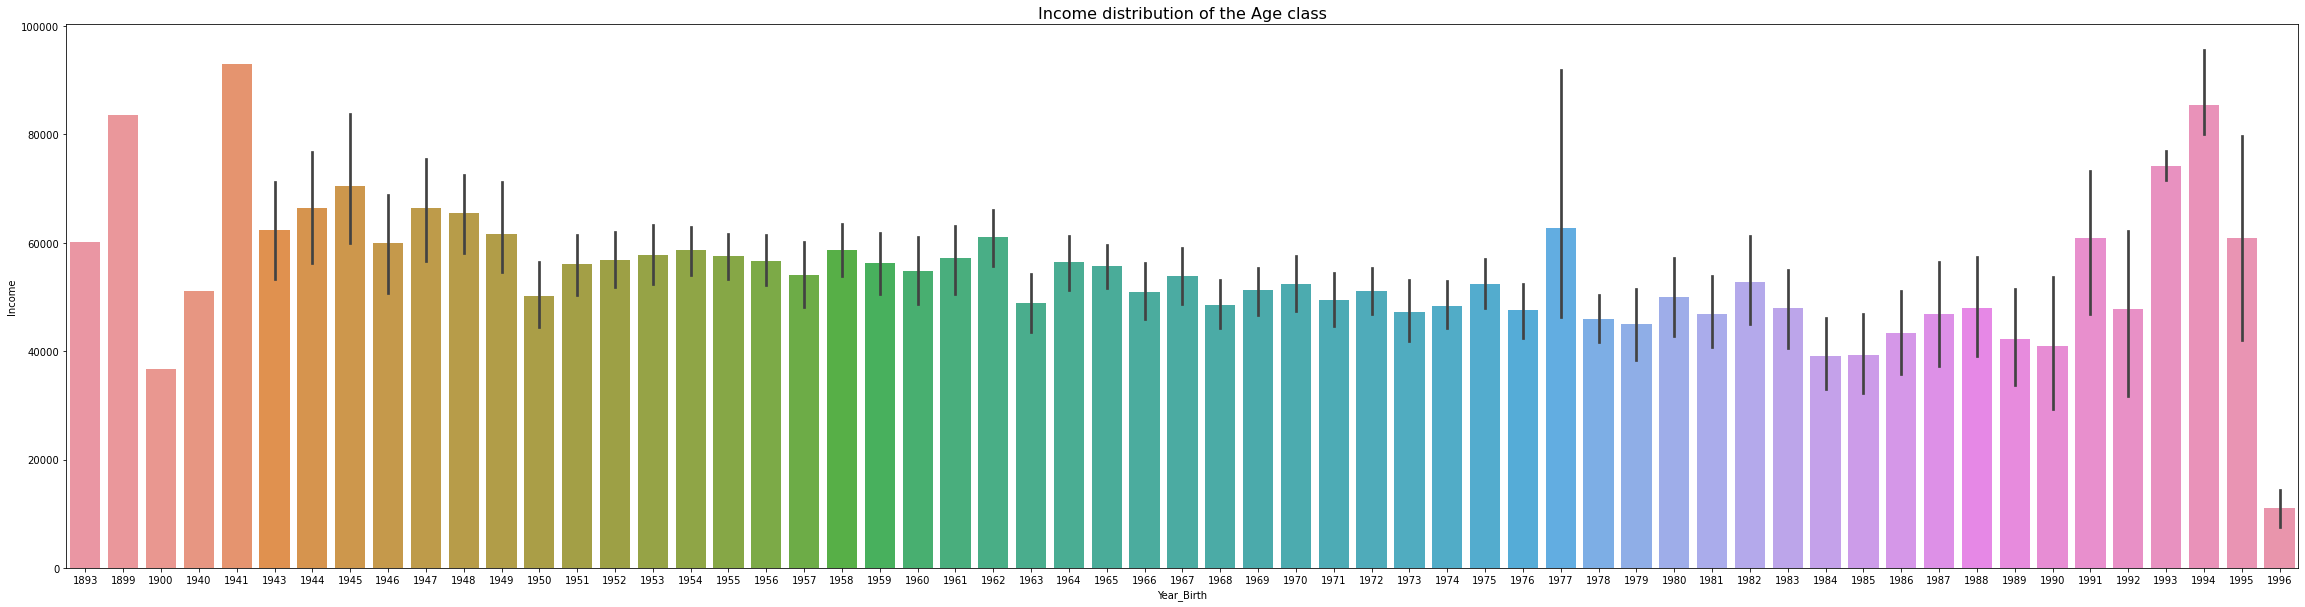

In [24]:
# Frequency of the Ages of the consumers based on their income

plt.figure(figsize=(40,10))
sns.barplot(x = 'Year_Birth', y = 'Income', data = marketing_data)
plt.title('Income distribution of the Age class', size=16)
plt.show()

In [25]:
#marketing_data = marketing_data[marketing_data['Year_Birth']< 100]

In [26]:
# Clustering the ages of the target market

marketing_data['Age_Group'] = pd.cut(marketing_data['Age'], bins=[25,40,60,130], labels=['Adult','Middle_Age','Senior_Citizens'])

In [27]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,51,Middle_Age
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,60,Middle_Age
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,63,Senior_Citizens
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,54,Middle_Age
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,32,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,1,45,Middle_Age
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,1,44,Middle_Age
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,1,45,Middle_Age
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,0,43,Middle_Age


The target market ages are from 25 - 128 years old. I don't want to consider customers older than 100 years old as outliers because, Nigeria for example, we have very old politicians that are still in service and earning a large sum of income

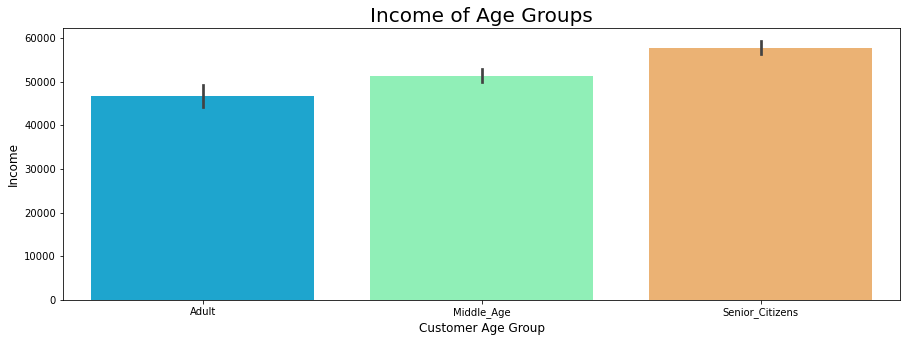

In [28]:
plt.figure(figsize = (15, 5))
sns.barplot(x='Age_Group', y='Income', data=marketing_data, palette='rainbow')
plt.title('Income of Age Groups', fontsize=20)
plt.xlabel('Customer Age Group',fontsize=12)
plt.ylabel('Income',fontsize=12);

I grouped the target market ages into group. 25-40 are Adults, 41 - 60 are Middle Age and 61 - 128 are Senior Citizens

<AxesSubplot:xlabel='Country', ylabel='Income'>

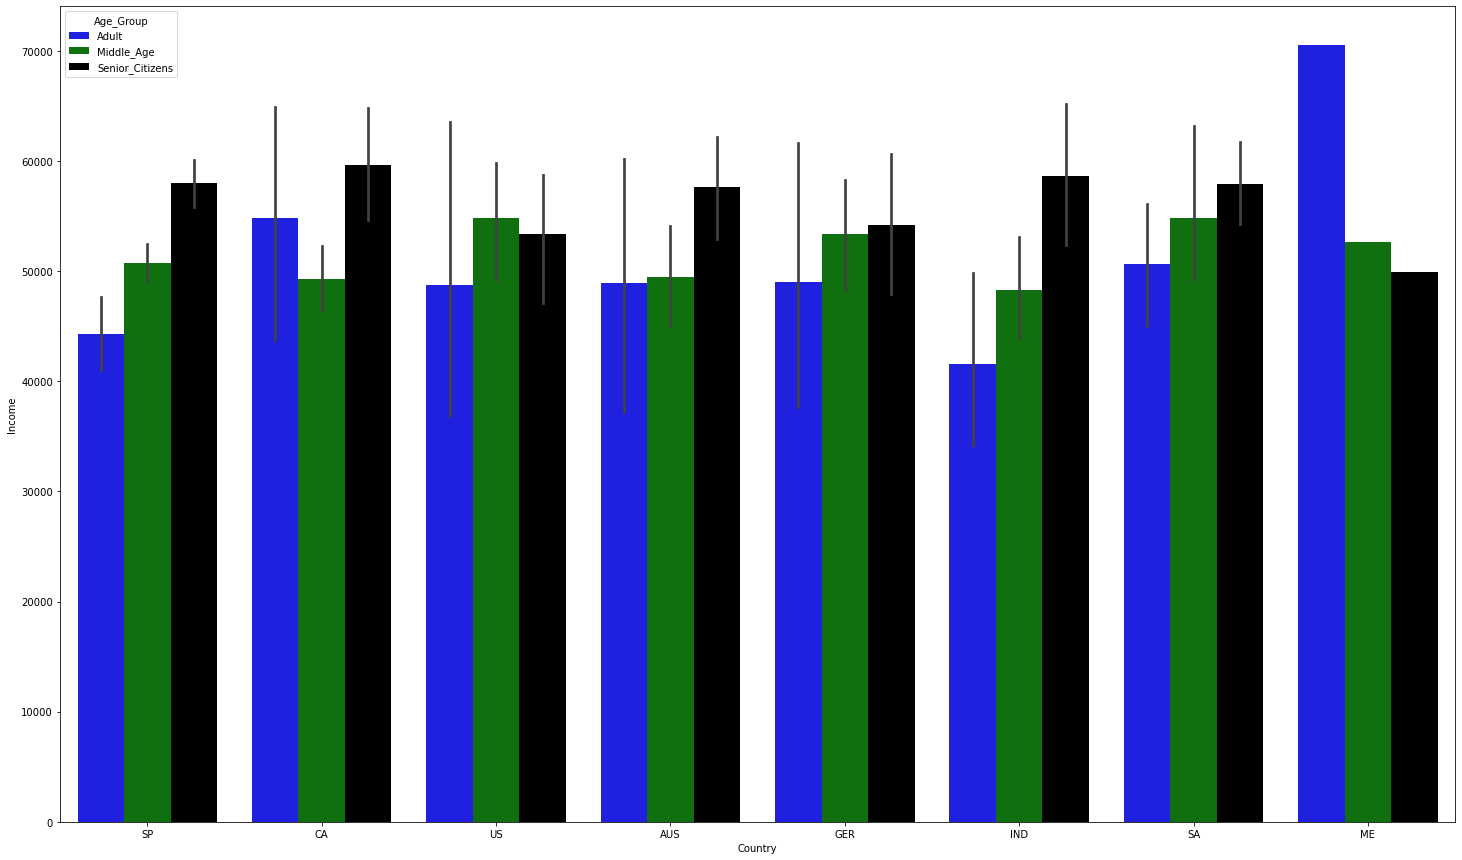

In [29]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Country', y = 'Income', hue= 'Age_Group', data = marketing_data, palette=["blue", "green", "black"])

Customers in Montenegro are the highest salary earners, most of these customers are the Adults, followed by the Middle_Age and the senior citizens are the lowest earners in this country.

Also, for most Eu countries, the senior citizens earns higher.

In [30]:
marketing_data1 = marketing_data.groupby(['Education'])['Income'].mean().reset_index()

In [31]:
round(marketing_data1.nlargest(4, 'Income'))

,Education,Income
4,PhD,56145.0
3,Master,52918.0
2,Graduation,52720.0
0,2n Cycle,47633.0


In [32]:
round(marketing_data1.nsmallest(3, 'Income'))

,Education,Income
1,Basic,20306.0
0,2n Cycle,47633.0
2,Graduation,52720.0


he highest earners are PhD holdres with 56145 dollars, followed by Masters holders, and the least earners are the Basic class.

<AxesSubplot:xlabel='Education', ylabel='Income'>

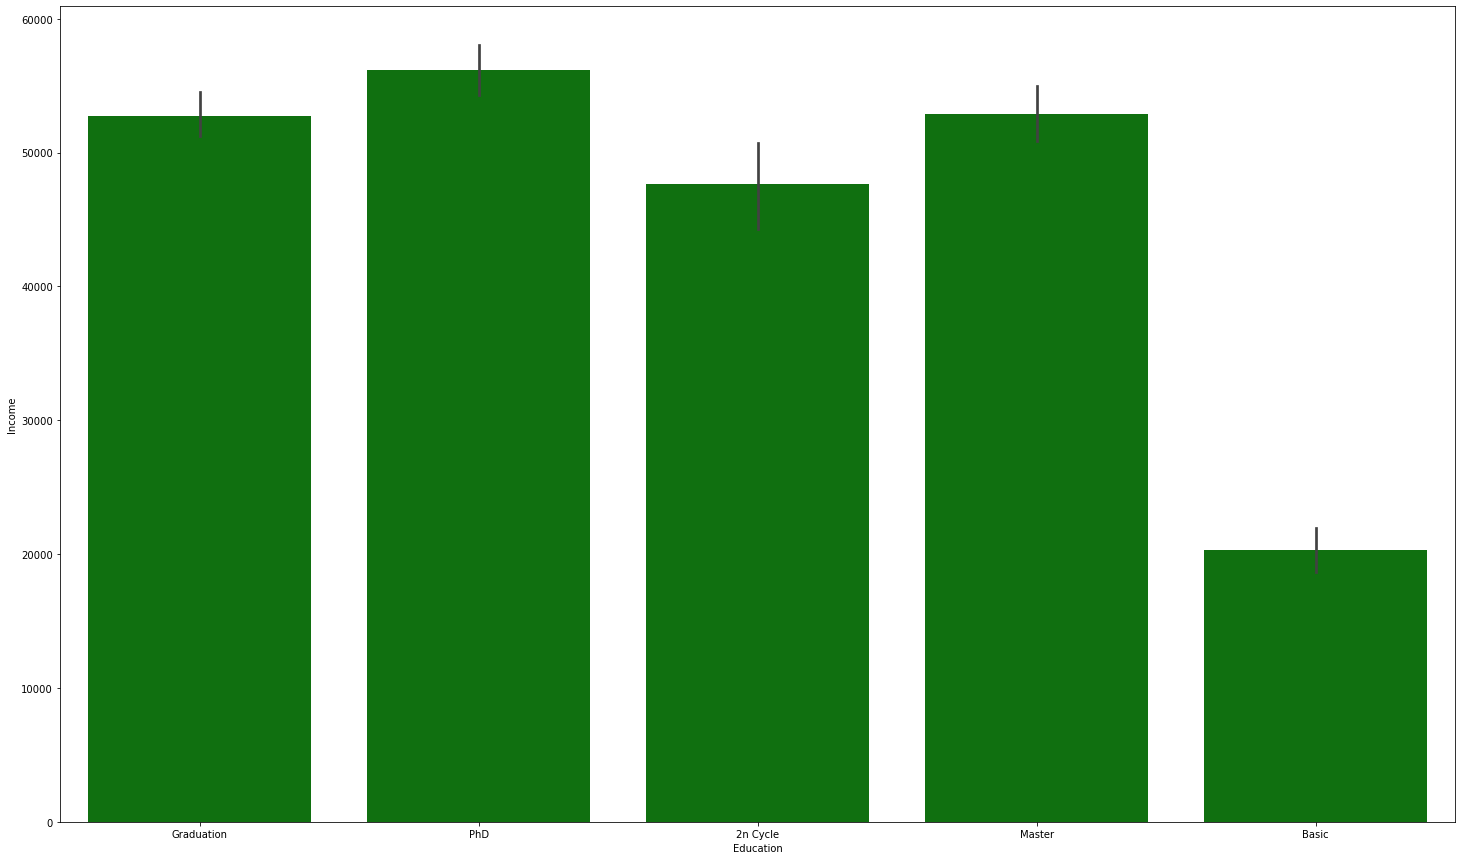

In [33]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Education', y = 'Income', data = marketing_data, palette=["green"])

<AxesSubplot:xlabel='Education', ylabel='Income'>

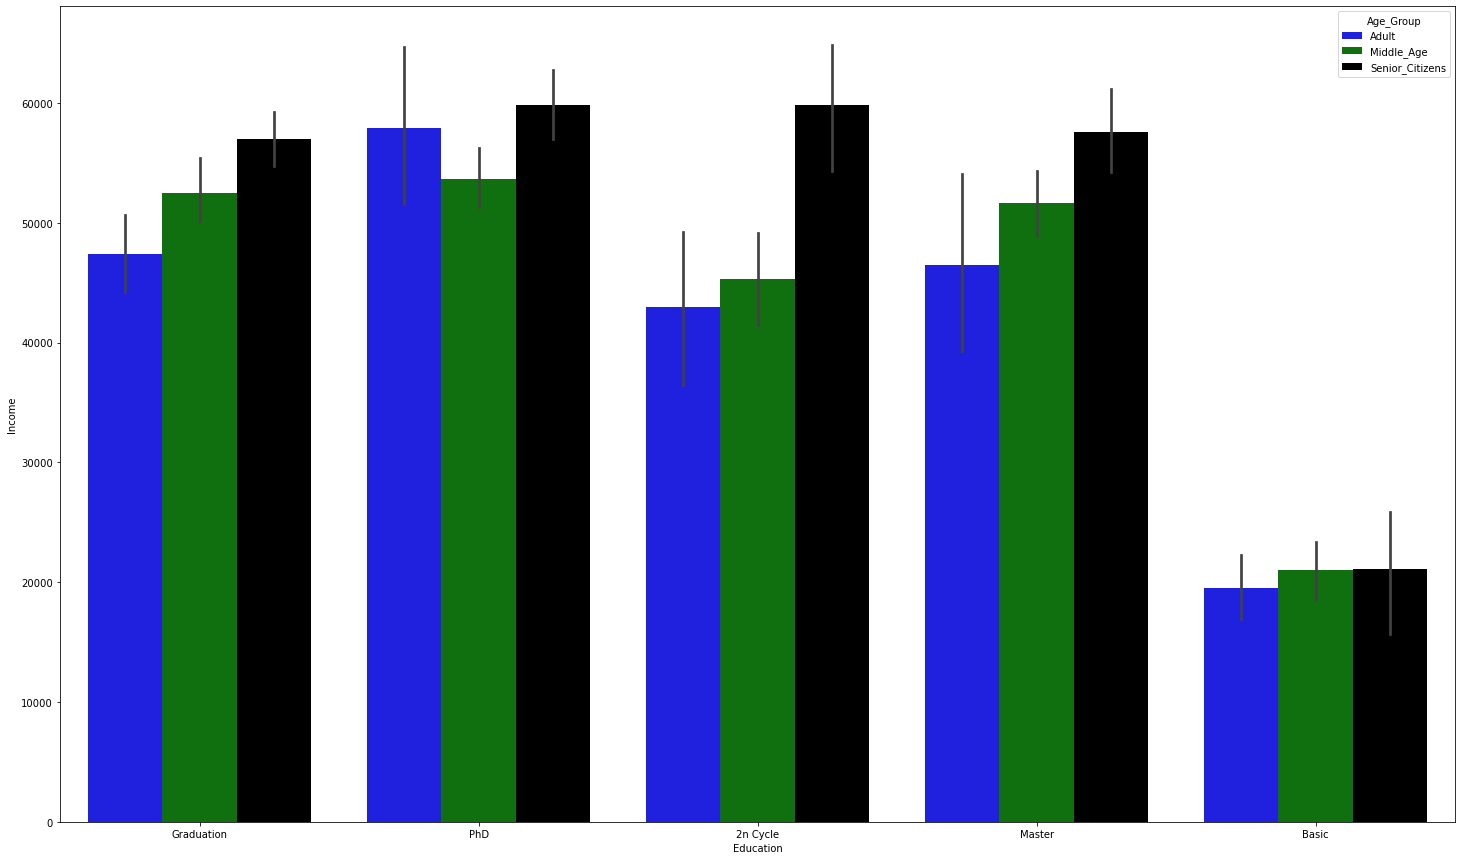

In [34]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Education', y = 'Income', hue = 'Age_Group', data = marketing_data, palette=["blue", "green", "black"])

Marital_status class with Income

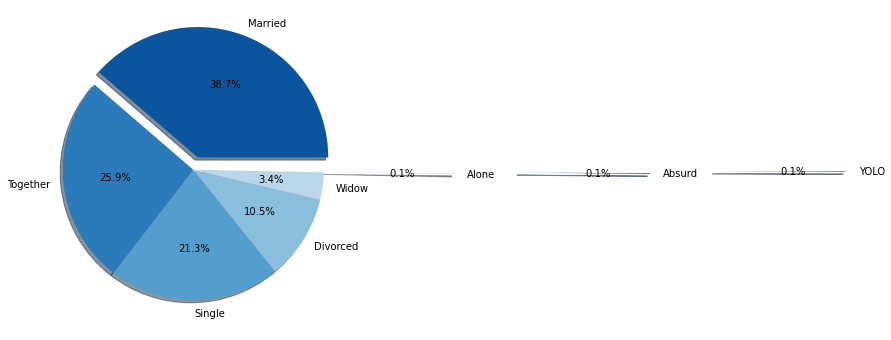

In [37]:
relationship = marketing_data['Marital_Status'].value_counts().to_frame('Count')

sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(relationship['Count'], labels = relationship.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), shadow = True, autopct = '%1.1f%%')
plt.show()

Overall customer's marital status:

38% of the customers are married, 26% are living together and the least customers are the Absurd, Yolo and Alone customers.

In [38]:
marketing_data2 = marketing_data.groupby(['Marital_Status'])['Income'].mean().reset_index()

In [39]:
marketing_data2.nlargest(5, 'Income')

,Marital_Status,Income
0,Absurd,72365.500000
6,Widow,56481.552632
5,Together,53245.534031
2,Divorced,52834.228448
3,Married,51724.978996


In [40]:
round(marketing_data2.nsmallest(3, 'Income'))

,Marital_Status,Income
1,Alone,43789.0
7,YOLO,48432.0
4,Single,50995.0


The highest earners in Marital status class are the Absurd group and the young Adults in this group are the highest earners.

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

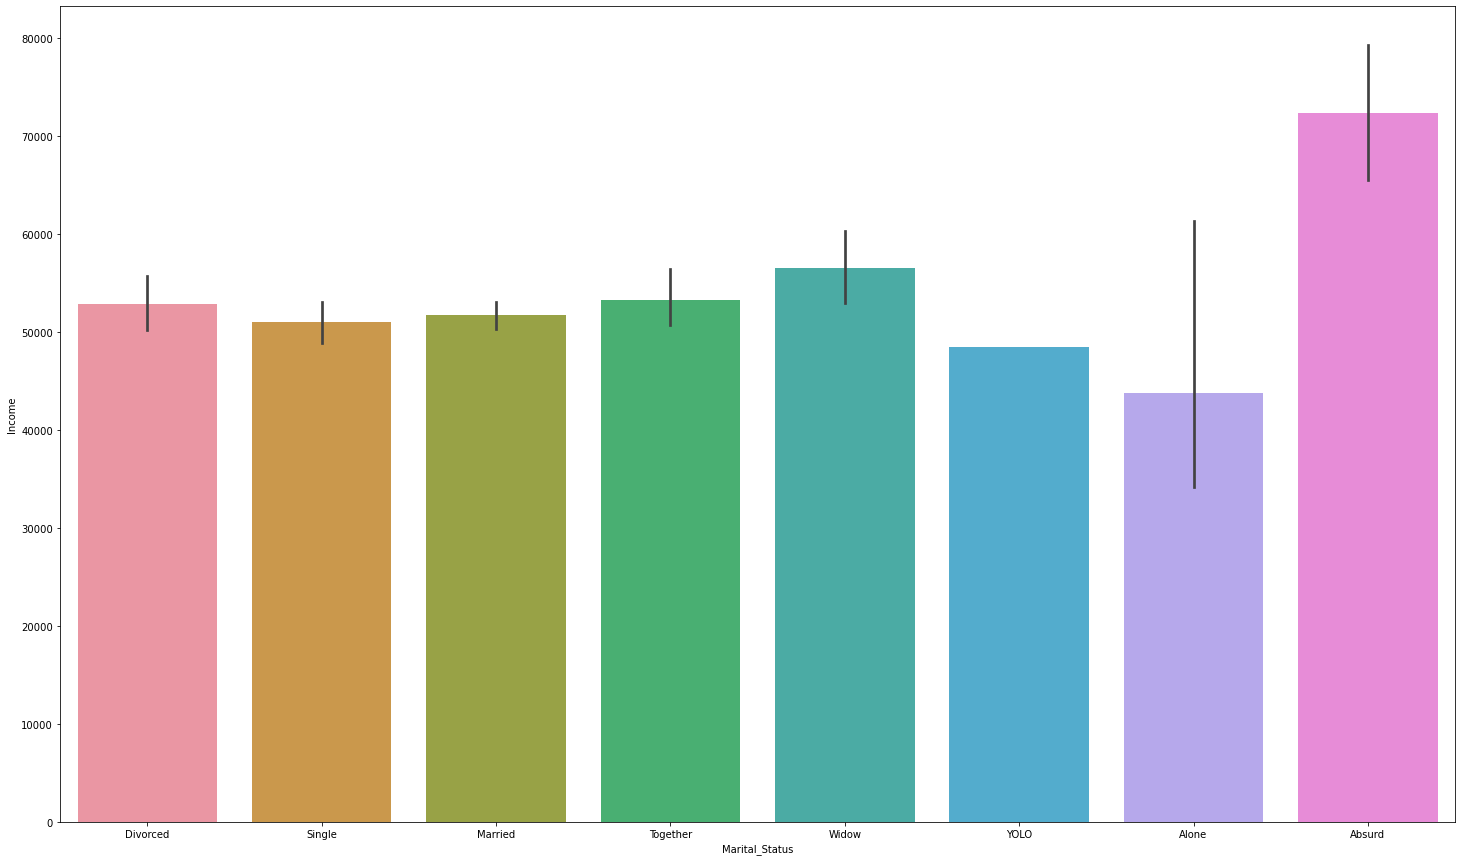

In [41]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Marital_Status', y = 'Income', data = marketing_data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

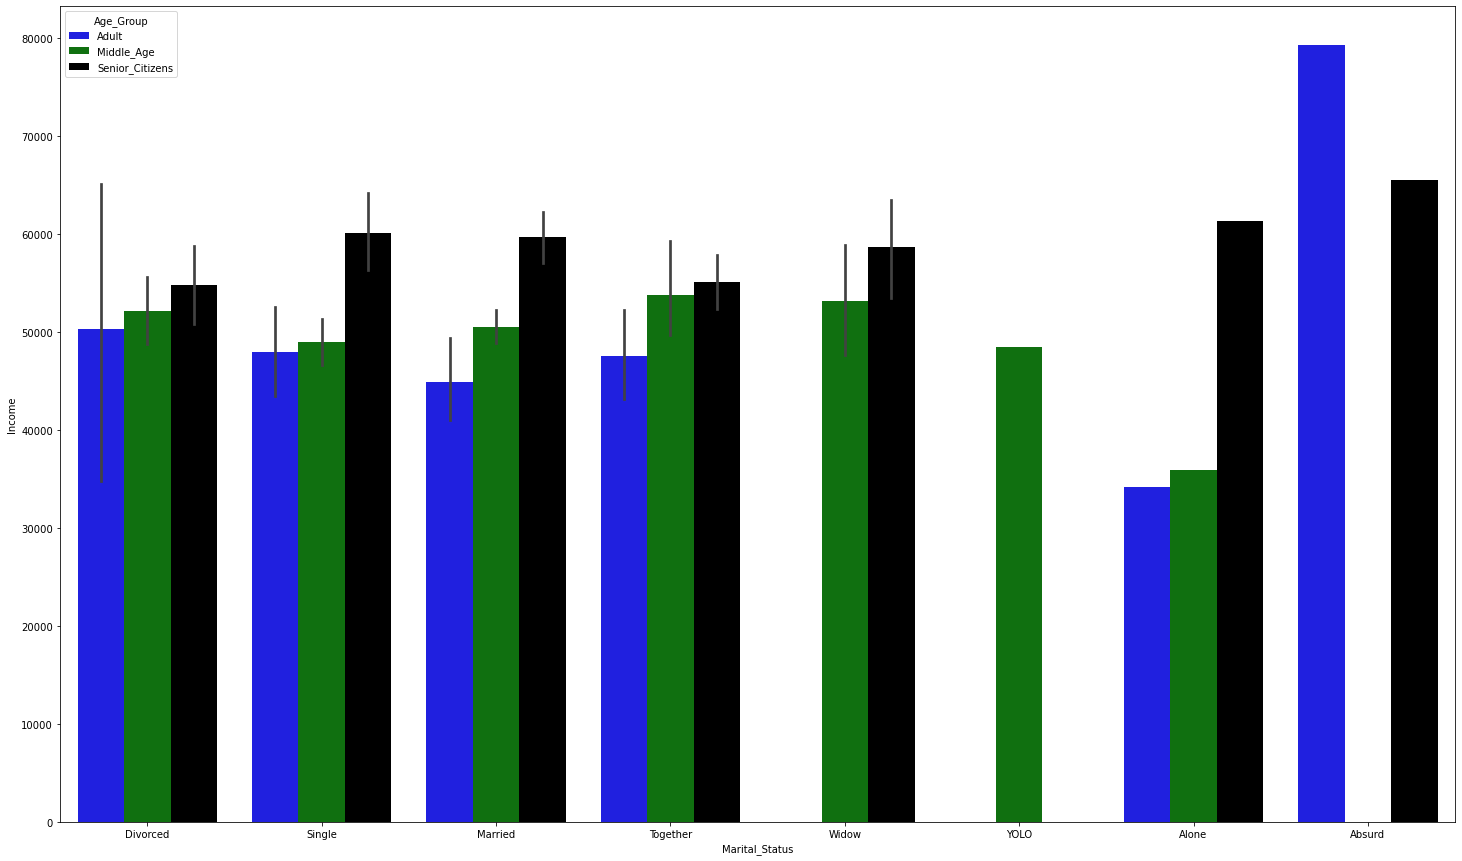

In [42]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Marital_Status', y = 'Income', hue = 'Age_Group', data = marketing_data, palette=["blue", "green", "black"])

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

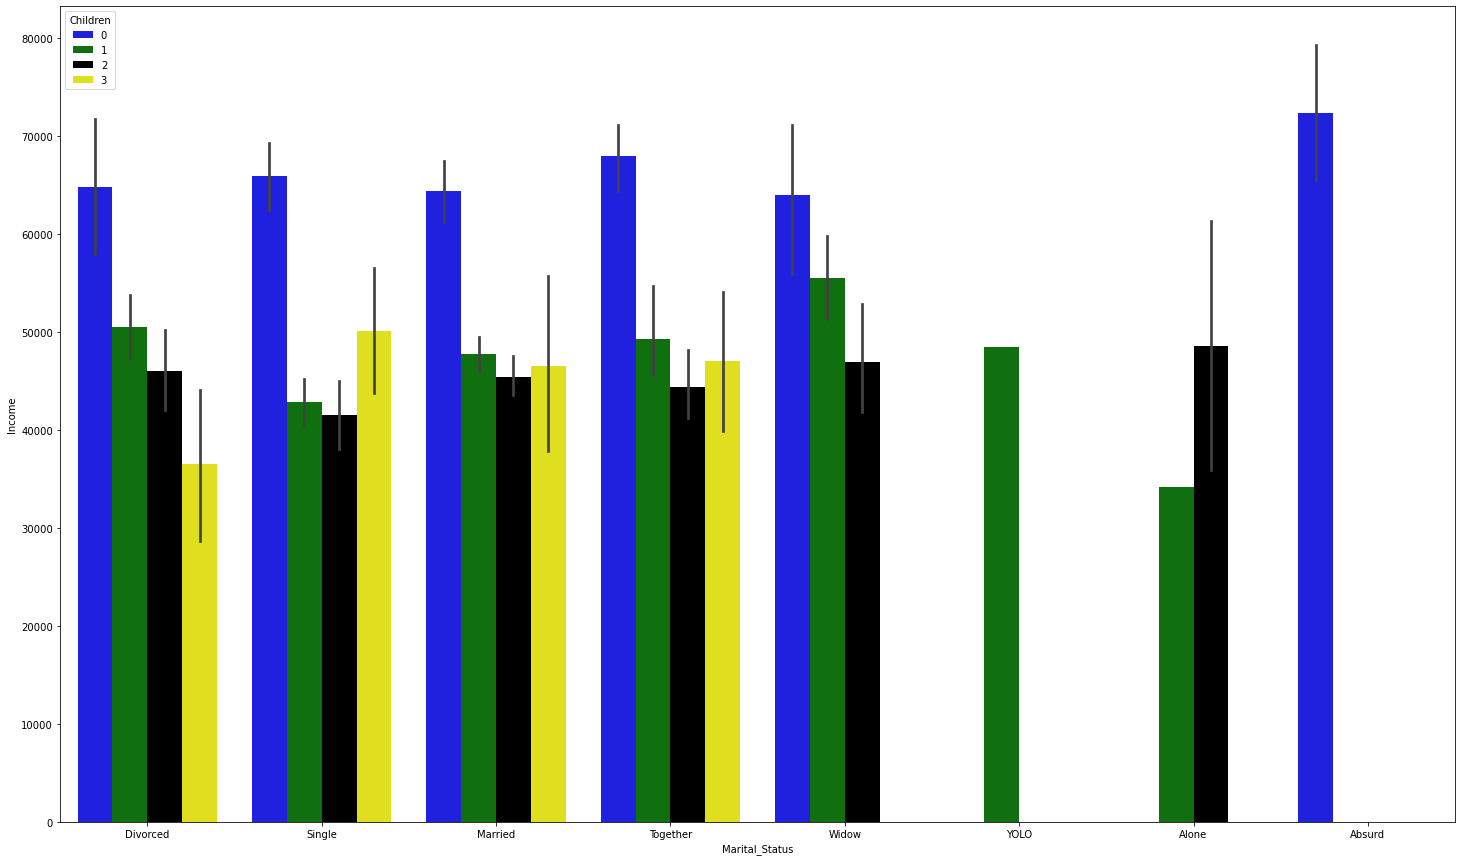

In [43]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Marital_Status', y = 'Income', hue = 'Children', data = marketing_data, palette=["blue", "green", "black", 'yellow'])

Most of the customers that has no child earns the highest salaries, and the Absurd class that are neither married or divorced are the highest earners and has no child at all.

Total number of customers in countries

Text(0, 0.5, 'Total number of customers')

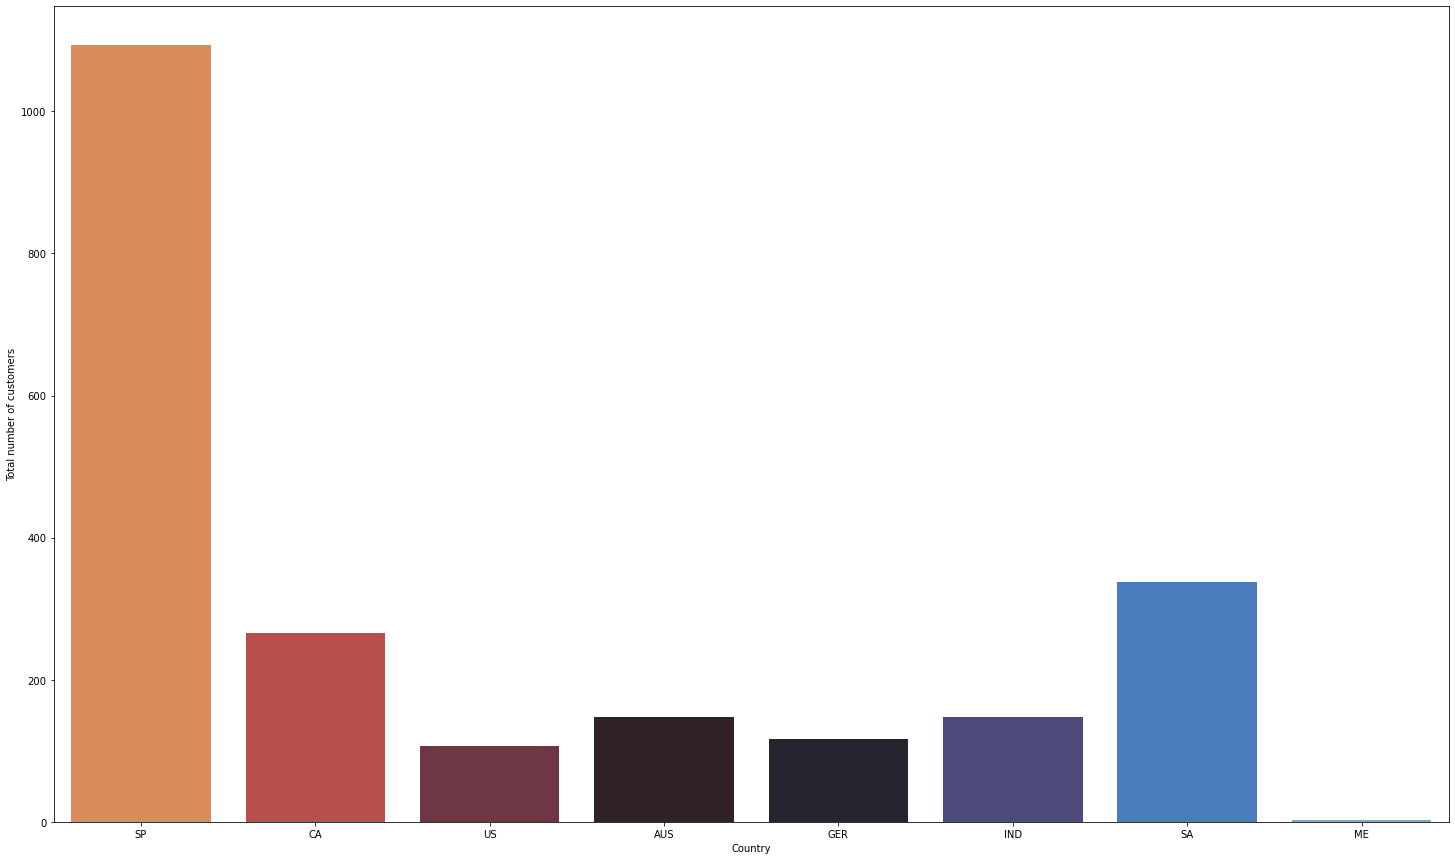

In [44]:
plt.figure(figsize = (25, 15))
sns.countplot(x = marketing_data['Country'], palette = 'icefire_r')
plt.ylabel('Total number of customers')


Spain, according to the visualization has the highest customers, compared to other countries, and ME has the lowest number of customers

In [45]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,51,Middle_Age
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,60,Middle_Age
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,63,Senior_Citizens
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,54,Middle_Age
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,32,Adult


### Purchase History (Total Spent in the last two years)

Real-time sales analysis - knowing what is bought, by whom, where, how often and when, a business can match supply more accurately with demand and reduce wasted capacity or store.

In [46]:
marketing_data['Total_Spent'] = (marketing_data['MntWines'] + marketing_data['MntFruits'] + marketing_data['MntMeatProducts']
                                             + marketing_data['MntGoldProds'] + marketing_data['MntFishProducts'] + marketing_data['MntSweetProducts'])

In [47]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [48]:
marketing_data.drop(['ID', 'Year_Birth'],axis=1, inplace=True)

In [49]:
marketing_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group,Total_Spent
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,0,1,0,SP,0,51,Middle_Age,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,0,1,1,0,CA,0,60,Middle_Age,577
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,0,US,1,63,Senior_Citizens,251
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,0,0,AUS,2,54,Middle_Age,11
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,0,0,1,0,SP,1,32,Adult,91


In [50]:
customer_spent = marketing_data.groupby(['Total_Spent'])['Income'].mean().reset_index()

In [51]:
customer_spent.max()

Total_Spent      2525.0
Income         160803.0
dtype: float64

<AxesSubplot:xlabel='Total_Spent', ylabel='Income'>

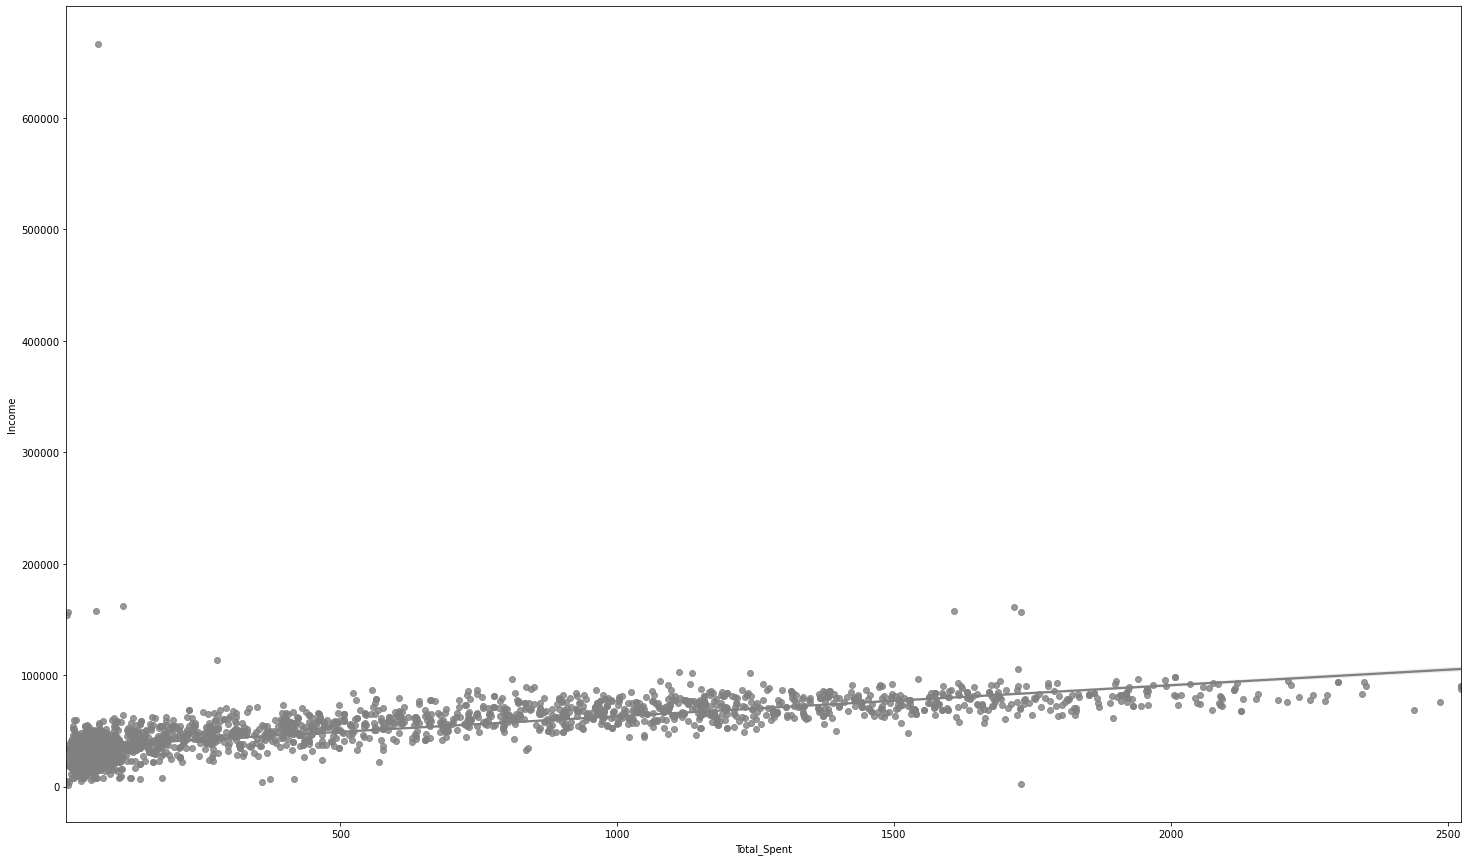

In [52]:
plt.figure(figsize = (25, 15))
sns.regplot(x = marketing_data['Total_Spent'], y = marketing_data['Income'], color = 'grey')

<AxesSubplot:xlabel='Age_Group', ylabel='Total_Spent'>

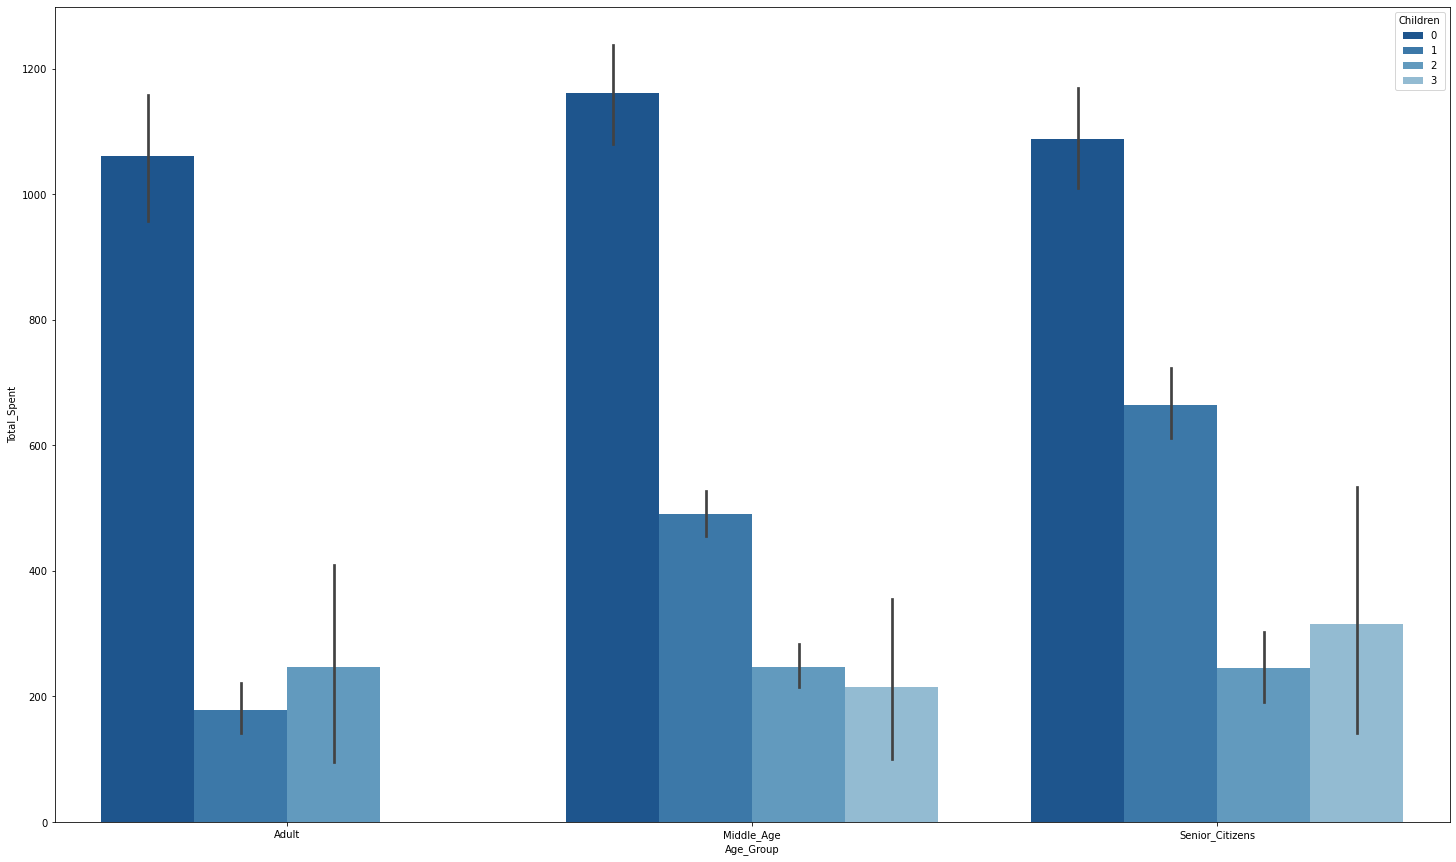

In [53]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Age_Group', y = 'Total_Spent', hue = 'Children', data = marketing_data)

Customers with zero children has better purchase history, and the middle age groups(41 -60) has higher purchase history.

<AxesSubplot:xlabel='Education', ylabel='Total_Spent'>

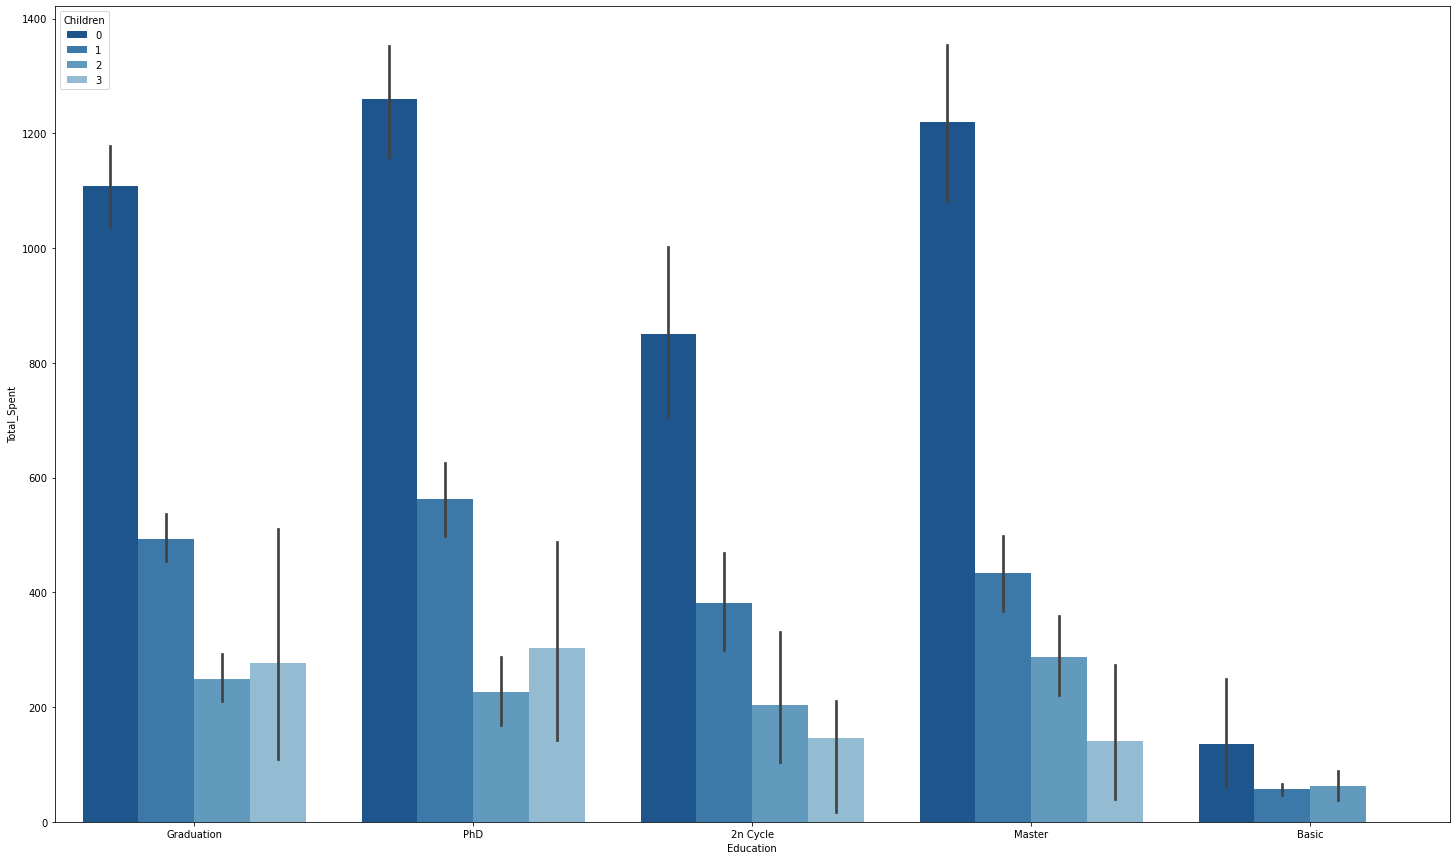

In [54]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Education', y = 'Total_Spent', hue = 'Children', data = marketing_data)

Based on total purchases in the last two years, PhD class with more children had more purchases compared to other consumers.

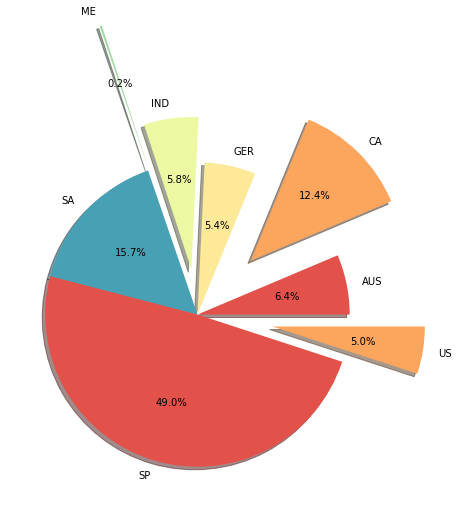

In [55]:
pm = marketing_data[['Total_Spent', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Total_Spent']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),
        shadow = True, autopct = '%1.1f%%')
plt.show()

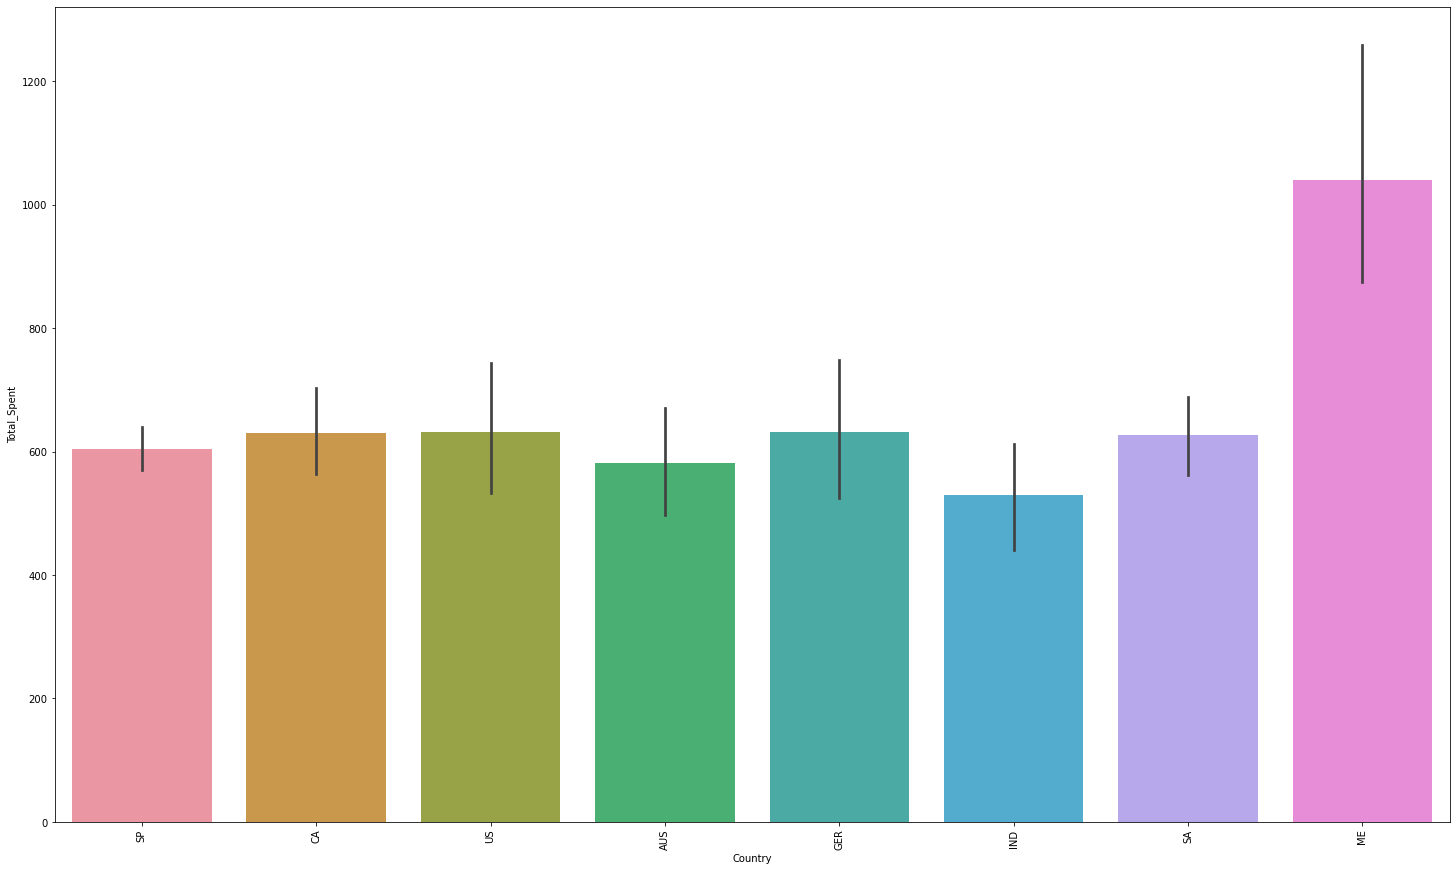

In [56]:
# Best Selling by country
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Country', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Montenegro has the highest frequencies of purchases over the last two years. This country has the lowest customers in terms of volume, but has more customers that are loyal to the company and has a healthy and better purchase history over the last two years than other countries.  This country also has the highest salary earners for the customers, although, the company's customers living here are few, but they contribute more in terms of cash flow. 

The marketing analyst should pay more attention to this region and plan targeted campaigns to grow this country for better sales.

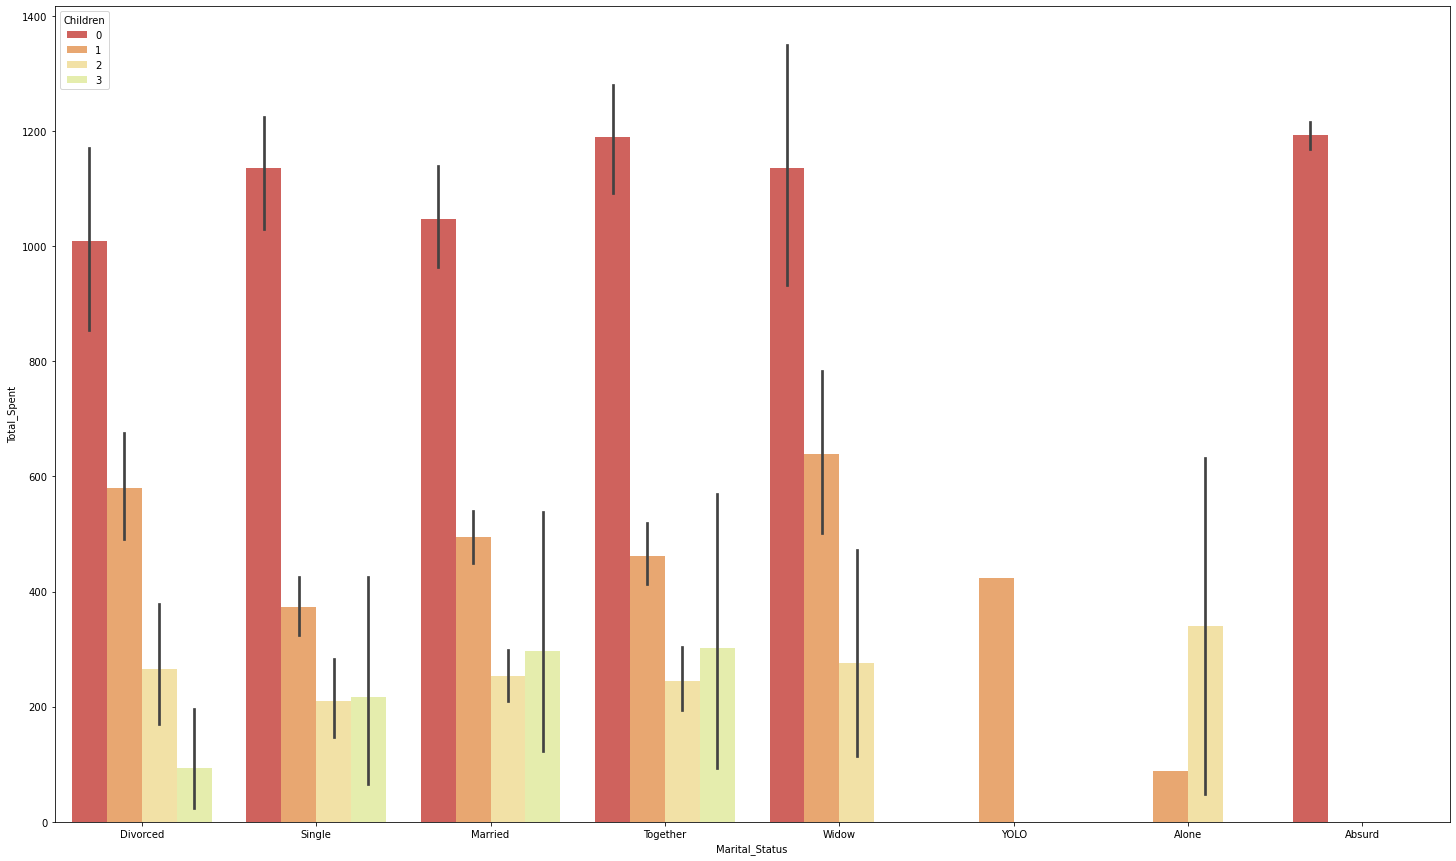

In [57]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', hue= 'Children', data = marketing_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Customers with more children and are living together has more purchase

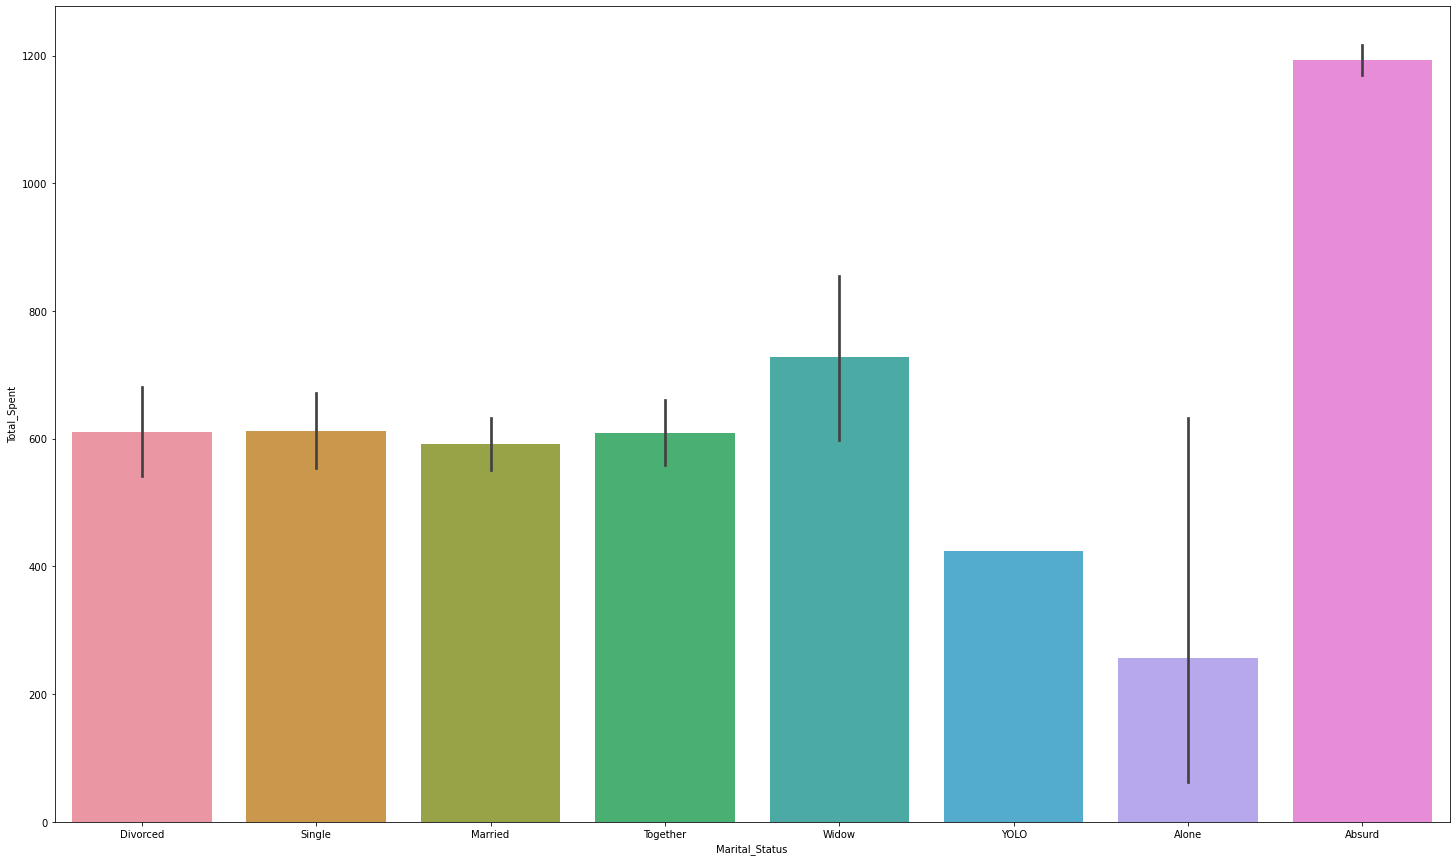

In [58]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', data = marketing_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

When visualising the total spent against the marital class, without including whether they have children or not, Absurd class has more purchase.

#### Best Selling Products

In [59]:
marketing_wine = marketing_data.groupby(['Total_Spent'])['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean().reset_index()

marketing_wine.nlargest(10, 'Total_Spent')

,Total_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1046,2525,1156.0,120.0,915.0,94.0,144.0,96.0
1045,2524,1259.0,172.0,815.0,97.0,148.0,33.0
1044,2486,1394.0,22.0,708.0,89.0,91.0,182.0
1043,2440,1315.0,22.0,780.0,145.0,0.0,178.0
1042,2352,1083.0,108.0,649.0,253.0,151.0,108.0
1041,2349,1302.0,68.0,731.0,89.0,114.0,45.0
1040,2346,968.0,147.0,842.0,137.0,42.0,210.0
1039,2302,1111.0,24.0,790.0,160.0,45.0,172.0
1038,2283,966.0,168.0,672.0,246.0,105.0,126.0
1037,2279,736.0,63.0,946.0,219.0,189.0,126.0


In [60]:
goods_purchased = marketing_data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
                                  'MntSweetProducts', 'MntGoldProds' ]]

<AxesSubplot:>

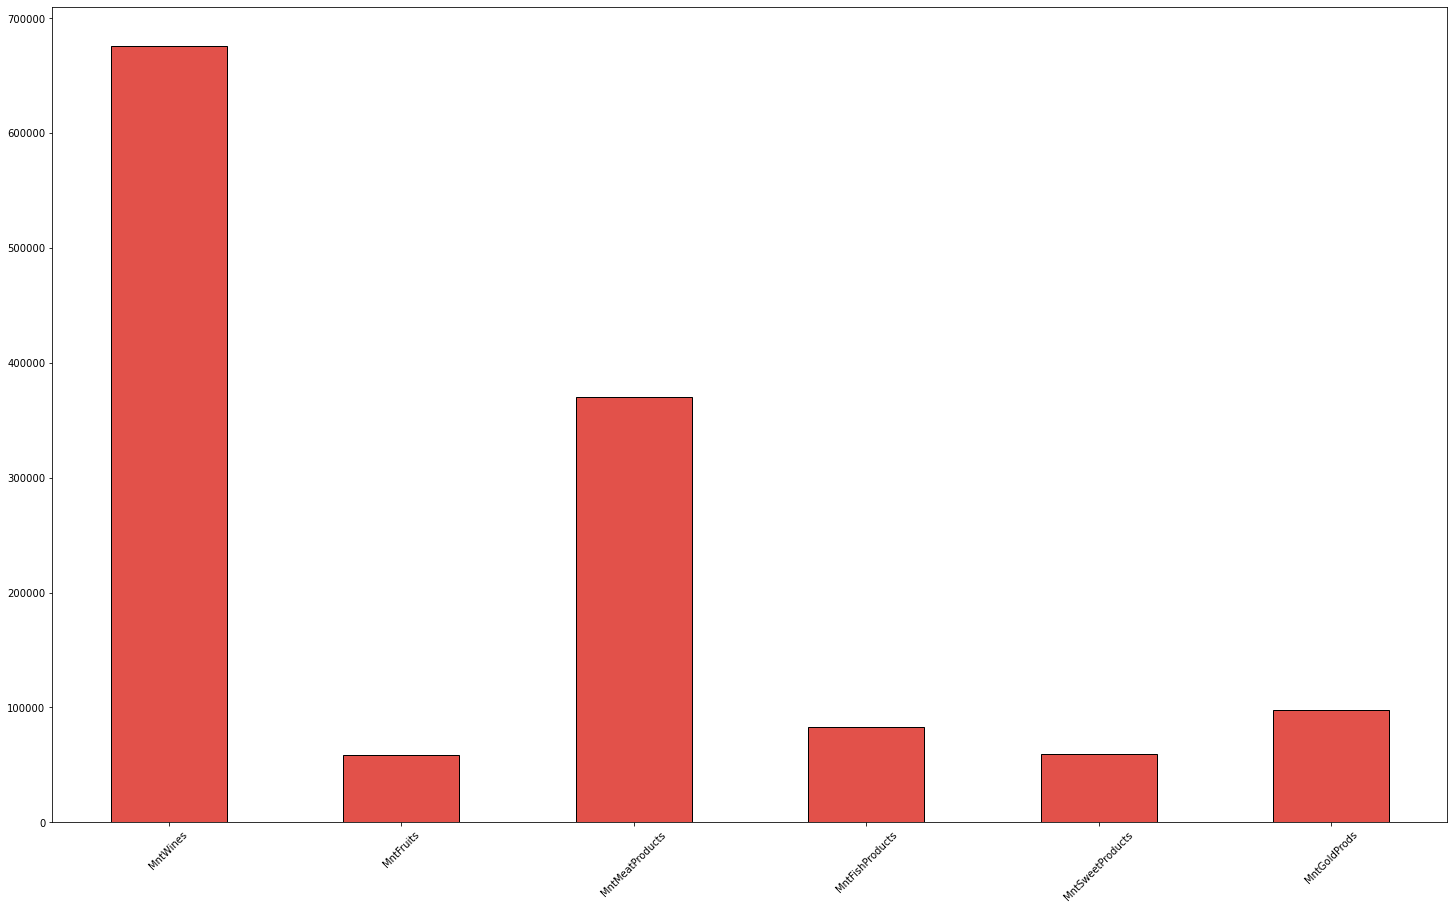

In [61]:
goods_purchased.sum().plot(kind='bar',figsize=(25,15),edgecolor=(0,0,0), rot=45)


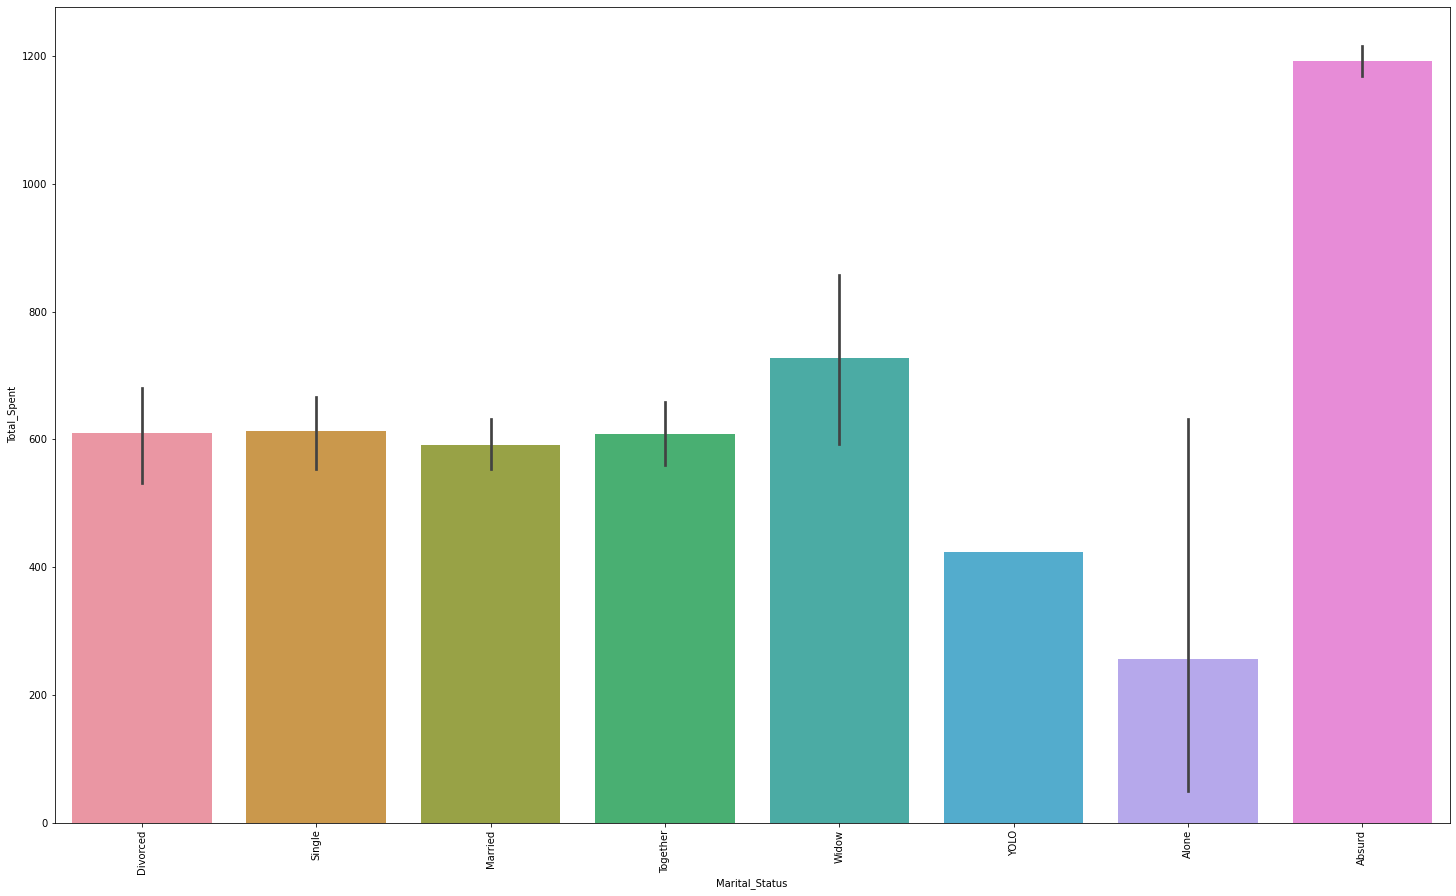

In [62]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [63]:
marketing_data['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

 ### Recency - Number of days since customers' last purchase

In [64]:
last_purchased = marketing_data.groupby(['Recency'])['Age'].mean().reset_index()

last_purchased.nlargest(10, 'Recency')

,Recency,Age
99,99,53.000000
98,98,47.863636
97,97,51.750000
96,96,55.695652
95,95,47.777778
94,94,47.192308
93,93,48.809524
92,92,56.466667
91,91,53.500000
90,90,54.700000


<AxesSubplot:xlabel='Recency', ylabel='Density'>

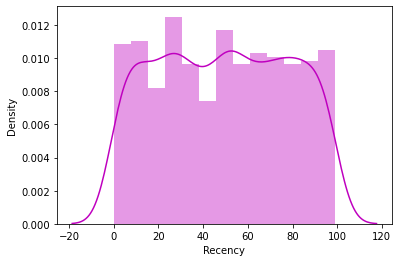

In [65]:
plt.figurefigsize = (10, 5 )
sns.distplot(marketing_data['Recency'], color = 'm')

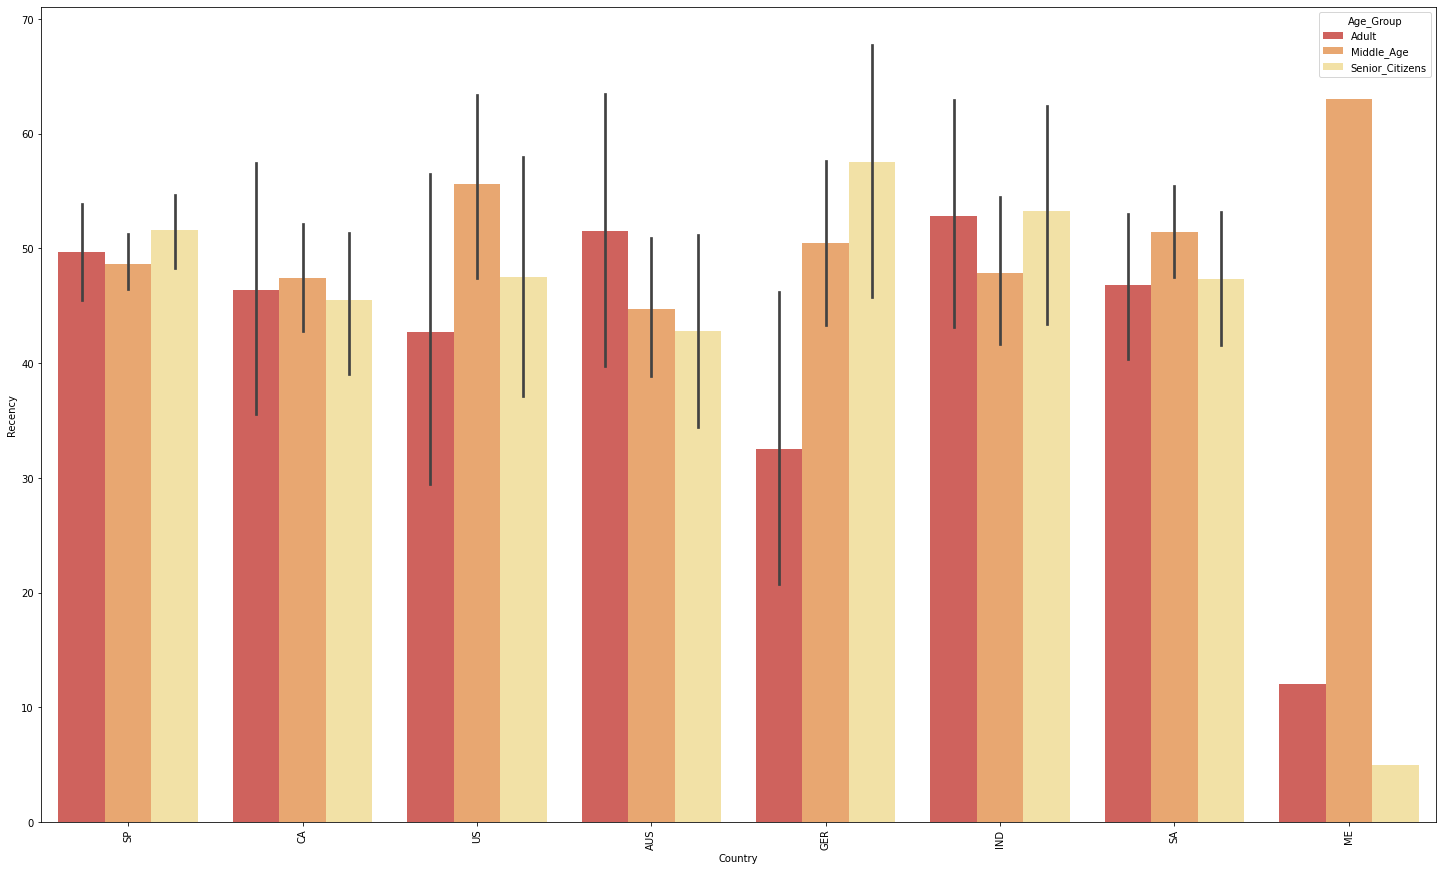

In [66]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Country', y = 'Recency', hue = 'Age_Group', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Spain has the highest number of customers for this company, and their last purchased was between 48 - 50 days ago(All the age group in this country has stopped patronising this company).

Montenegro, the best selling country, the Middle Age last purchased was 64 days ago,
Adult last purchased was 12 days ago, meaning that this age group is still buying products from this XYZ company till date and the senior age group last purchased was 5 days ago.

The marketing Analyst should making findings to know why this best selling country's middle age group has drastically reduced their frequencies of purchases, by making compelling and enriching strategies that will meet the needs of this middle age.

In [67]:
marketing_data['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

### Lifetime of a customer over a period of time

Top customers based on purchase history


In [68]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [69]:
marketing_data['present_date'] = '2021/02/08'

In [70]:
marketing_data['present_date']  = pd.to_datetime(marketing_data['present_date'])

In [71]:
import datetime as dt

In [72]:
marketing_data['customer_lifetime'] = (marketing_data['present_date'].sub(marketing_data['Dt_Customer']).dt.days.div(365).round(1))

In [73]:
# Customer life time in years

marketing_data['customer_lifetime'].reset_index()

,index,customer_lifetime
0,0,6.7
1,1,6.7
2,2,6.7
3,3,6.8
4,4,6.8
...,...,...
2211,2235,7.9
2212,2236,8.1
2213,2237,8.2
2214,2238,8.2


Loyal and satisfied customers have been with the company for 6 years, 8 months to 8 years, 4 months.


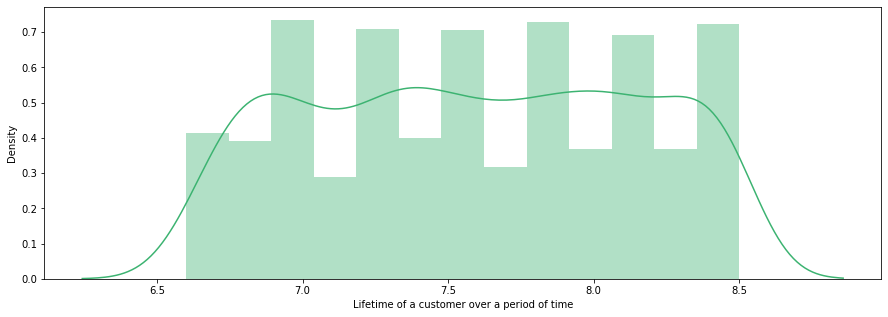

In [74]:
plt.figure(figsize = (15, 5))
sns.distplot(marketing_data['customer_lifetime'], color = 'mediumseagreen')
plt.xlabel('Lifetime of a customer over a period of time')

print('Loyal and satisfied customers have been with the company for 6 years, 8 months to 8 years, 4 months.')

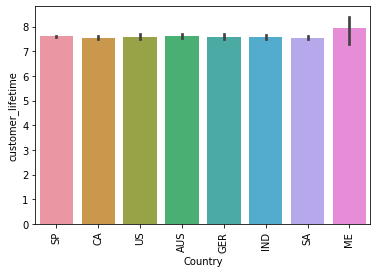

In [75]:
# Best Selling by country
ax = sns.barplot(x = 'Country', y = 'customer_lifetime', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The average lifetime of custermers per country, shows ME has a longer customer retention and brand loyalty as compared to other customers from other countries.

### Campaign effectiveness and channels analysis


Number of customers who visited the website was on the increase.
Number of purchases made directly in stores recorded more sales compared to other channels


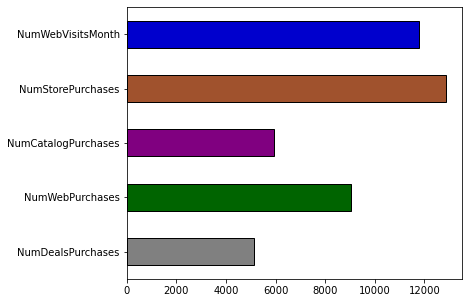

In [76]:
# Which of the channels are performing better?

campaign_channels = marketing_data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
campaign_channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

print('Number of customers who visited the website was on the increase.')

print('Number of purchases made directly in stores recorded more sales compared to other channels')

#### Analysing the campaign effectiveness 

In [77]:
def plot_data(column_x, column_y, data):
    plt.figure(figsize = (6, 6))
    ax = sns.barplot(x = column_x, y = column_y, data = data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    

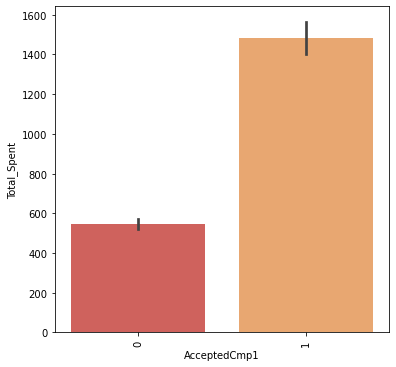

In [78]:
campaign_1_plot = plot_data('AcceptedCmp1', 'Total_Spent', marketing_data)

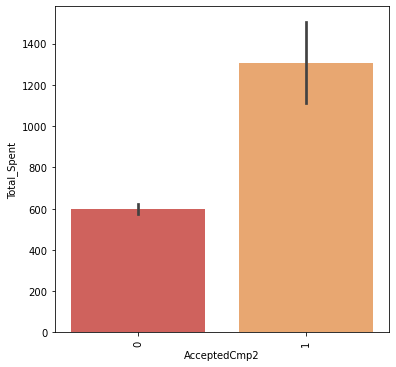

In [79]:
campaign_2_plot = plot_data('AcceptedCmp2', 'Total_Spent', marketing_data)

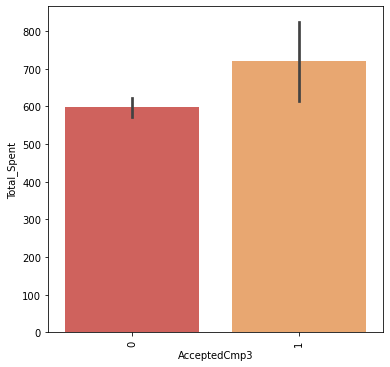

In [80]:
campaign_3_plot = plot_data('AcceptedCmp3', 'Total_Spent', marketing_data)

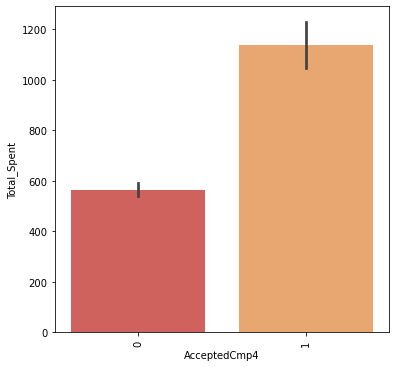

In [81]:
campaign_1_plot = plot_data('AcceptedCmp4', 'Total_Spent', marketing_data)

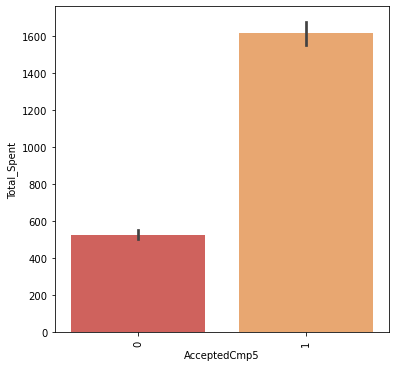

In [82]:
campaign_1_plot = plot_data('AcceptedCmp5', 'Total_Spent', marketing_data)

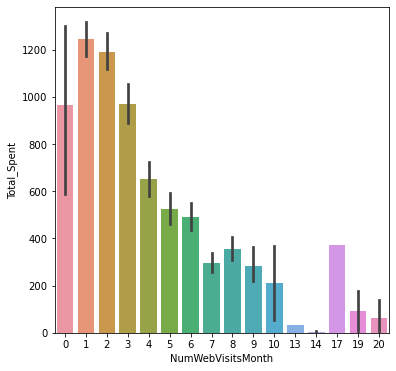

In [83]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'NumWebVisitsMonth', y = 'Total_Spent', data = marketing_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

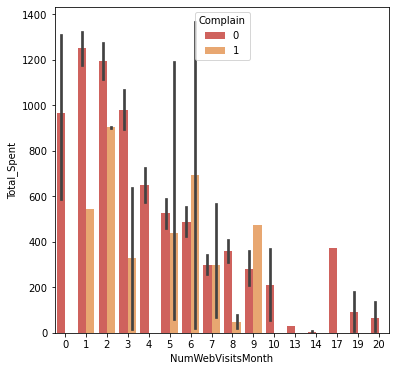

In [84]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'NumWebVisitsMonth', y = 'Total_Spent', hue = 'Complain', data = marketing_data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

As traffic increased on this website, total sales recorded reduced. I believe XYZ company did not handle feedback and complaints of the customers very well and this explained the decline in sales .

In [90]:
# # I had to drop customers that are older than 100 years old to prevent having outliers in my clustering 
# in the next notebook, part 2. Clustering is very sensitive to outliers


marketing_data = marketing_data[marketing_data['Age'] < 100]

In [91]:
# Saving this dataset as a csv file for part 2 and 3 usage.

marketing_data.to_csv('clean_marketing_data.csv', index=False)

Observations:

Most are of the target market are married and met graduation as highest education level.

The majority of clients make under $100,000 and over half of them do not have kids or teens at home.

Spain has the largest customers for this XYZ company and the best purchase history based on total purchased is  Montenegro.



Recommendations/Suggestion:

Based on my insights from the exploratory data analysis, the marketing campaigns was not as effective as they were expected to be, because the company failed to identify their target consumer, also, some countries like Spain had more consumer for this brand, but Montenegro had the least consumers and this country generates more cash flow in terms of total spent compared to other countries. The marketing analyst should restrategise and focus in this market.

Secondly, the campaigns did not have correct or realistic success metrics, it appeared as though the campaign was a total failure, but it was not as bad as they thought. For instance, the number of customers who visted the brand website was on the increase and more customers also made purchases directly in stores.Therefore, the marketing analyst should Look at all of the metrics of success before they launch a campaign and come up with realistic, attainable goals for marketing campaign.

Finally, the campaign was not given enough time to be effective, several campaigns were executed when the previous ones were not  successful. When you don’t get the results you want from a marketing campaign it can be disheartening, to say the least. And the last thing you want to do is sink more time and money into a failing campaign. But at the same time, you need to ensure you give your marketing campaign enough time to succeed. The best way to do this is to set goals and timelines before the campaign launch. 